In [1]:
import cv2 #to preprocess images(open cv)
import os #to access file directories
import numpy as np # to deal with multidimensional matrices
from random import shuffle 
from tqdm import tqdm
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf 
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 

'''Setting up the env'''
  

IMG_SIZE = 150
LR = 1e-3

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


<ipython-input-59-957c343a3465>:5: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=512, hop_length=512, window='hann')


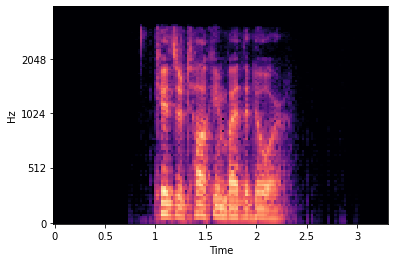

In [59]:
import librosa
import librosa.display 
i = "D:/AAA_video_course/Programming/dataset/Actor_01/03-01-01-01-01-01-01.wav"
x, sr = librosa.load(i)
mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=512, hop_length=512, window='hann')
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', x_axis='time',fmax = 4000);
#plt.axis('off')
plt.margins(x=0)

In [1]:
dir_calm= 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser\\calm\\'              #+boredom
dir_angry= 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser\\anger\\'        
dir_disgust = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser\\disgust\\'
dir_anxiety  = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser\\anxiety\\'      #+fear
dir_happy = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser\\happiness\\' 
dir_neutral = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser\\neutral\\'
dir_sad = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser\\sadness\\'
dir_surprise = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\FSER_REIMP_DONE\\out_fser\\surprise\\'

In [65]:
#emovo - emodb - savee - ravdess

In [67]:
#RAVDESS
"""
import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
for i in glob.glob("E:/ravd/sp/*/*.wav"):
        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود 
        
        x, sr = librosa.load(i)
        #x, index = librosa.effects.trim(x)        #top_db=60      
        mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=512, hop_length=512,window = 'hann')
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', fmax=4000, x_axis='time');
        plt.axis('off')
        plt.margins(x=0)
          
        file_name=os.path.basename(i)
        #part = file_name.split('.')[0]
        part = file_name.split("-")
        if part[2] == '01':
            plt.savefig(dir_neutral+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '02':
            plt.savefig(dir_calm+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '03':
            plt.savefig(dir_happy+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '04':
            plt.savefig(dir_sad+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '05':
            plt.savefig(dir_angry+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '06':
            plt.savefig(dir_anxiety+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '07':
            plt.savefig(dir_disgust+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '08':
            plt.savefig(dir_surprise+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
            
            
            """

'\nimport os\nimport glob\nimport librosa\nimport librosa.display\nimport numpy as np\nimport matplotlib.pyplot as plt\nfor i in glob.glob("E:/ravd/sp/*/*.wav"):\n        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود \n        \n        x, sr = librosa.load(i)\n        #x, index = librosa.effects.trim(x)        #top_db=60      \n        mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=512, hop_length=512,window = \'hann\')\n        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)\n        librosa.display.specshow(mel_spect, y_axis=\'mel\', fmax=4000, x_axis=\'time\');\n        plt.axis(\'off\')\n        plt.margins(x=0)\n          \n        file_name=os.path.basename(i)\n        #part = file_name.split(\'.\')[0]\n        part = file_name.split("-")\n        if part[2] == \'01\':\n            plt.savefig(dir_neutral+os.path.basename(i)+\'.jpg\',dpi = 120,bbox_inches=\'tight\', pad_inches = 0)\n            plt.close()\n        elif part[2] == \'02\':\n

In [70]:
#TESS
#TESS
"""
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
for i in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/*/*.wav"):
        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود 

        
        x, sr = librosa.load(i)       
        mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=512, hop_length=512,win_length=512, window='hann')
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', x_axis='time',fmax = 4000);
        plt.axis('off')
        plt.margins(x=0)
        
        file_name=os.path.basename(i)
        part=file_name.split('_')
        
        if part[2]=='angry.wav':
            plt.savefig(dir_angry+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == 'disgust.wav':
            plt.savefig(dir_disgust+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == 'fear.wav':
            plt.savefig(dir_anxiety+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
            
        if part[2] == 'happy.wav':   #elif
            plt.savefig(dir_happy+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == 'neutral.wav':
            plt.savefig(dir_neutral+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
            
        elif part[2] == 'ps.wav':
            plt.savefig(dir_surprise+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == 'sad.wav':
            plt.savefig(dir_sad+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
            
"""

'\nimport glob\nimport librosa\nimport librosa.display\nimport numpy as np\nimport matplotlib.pyplot as plt\nfor i in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/*/*.wav"):\n        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود \n\n        \n        x, sr = librosa.load(i)       \n        mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=512, hop_length=512,win_length=512, window=\'hann\')\n        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)\n        librosa.display.specshow(mel_spect, y_axis=\'mel\', x_axis=\'time\',fmax = 4000);\n        plt.axis(\'off\')\n        plt.margins(x=0)\n        \n        file_name=os.path.basename(i)\n        part=file_name.split(\'_\')\n        \n        if part[2]==\'angry.wav\':\n            plt.savefig(dir_angry+os.path.basename(i)+\'.jpg\',dpi = 120,bbox_inches=\'tight\', pad_inches = 0)\n            plt.close()\n        elif part[2] == \'disgust.wav\':\n            plt.savefig(dir_disgus

In [71]:
#emodb
"""
import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
for i in glob.glob("D:/AAA_video_course/Programming/A_main/emodb/wav/*.wav"):

        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود 
        
        x, sr = librosa.load(i)
        #x, index = librosa.effects.trim(x)        #top_db=60      
        mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=512, hop_length=512,window = 'hann')
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', fmax=4000, x_axis='time');
        plt.axis('off')
        plt.margins(x=0)
          
        file_name=os.path.basename(i)
        emotion=file_name[5]
        
        if emotion=='W':
            plt.savefig(dir_angry+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='L':
            plt.savefig(dir_calm+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='E':
            plt.savefig(dir_disgust+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='A':
            plt.savefig(dir_anxiety+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='F':
            plt.savefig(dir_happy+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='T':
            plt.savefig(dir_sad+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='N':
            plt.savefig(dir_neutral+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
            
            
"""

'\nimport os\nimport glob\nimport librosa\nimport librosa.display\nimport numpy as np\nimport matplotlib.pyplot as plt\nfor i in glob.glob("D:/AAA_video_course/Programming/A_main/emodb/wav/*.wav"):\n\n        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود \n        \n        x, sr = librosa.load(i)\n        #x, index = librosa.effects.trim(x)        #top_db=60      \n        mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=512, hop_length=512,window = \'hann\')\n        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)\n        librosa.display.specshow(mel_spect, y_axis=\'mel\', fmax=4000, x_axis=\'time\');\n        plt.axis(\'off\')\n        plt.margins(x=0)\n          \n        file_name=os.path.basename(i)\n        emotion=file_name[5]\n        \n        if emotion==\'W\':\n            plt.savefig(dir_angry+os.path.basename(i)+\'.jpg\',dpi = 120,bbox_inches=\'tight\', pad_inches = 0)\n            plt.close()\n        elif emotion==\'L\':\n          

In [75]:
# test emovo label extraction:
address  = 'D:/AAA_video_course/Programming/A_main/zzzdatasets/EMOVO'
file =  'D:/AAA_video_course/Programming/A_main/zzzdatasets/EMOVO/f1/dis-f1-b1.wav'
file_name=os.path.basename(file)
file_name[0:3]


'dis'

In [ ]:
# dis = disgust  / gio = joy / pau = fear / rab = anger / sor  =surprise  / tri = saddness / neu = neutral

In [78]:
#emovo:
"""
import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
for i in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/EMOVO/*/*.wav"):

        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود 
        
        x, sr = librosa.load(i)
        #x, index = librosa.effects.trim(x)        #top_db=60      
        mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=512, hop_length=512,window = 'hann')
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', fmax=4000, x_axis='time');
        plt.axis('off')
        plt.margins(x=0)
          
        file_name=os.path.basename(i)
        emotion=file_name[0:3]
        
        if emotion=='dis':
            plt.savefig(dir_disgust+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='gio':
            plt.savefig(dir_happy+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='pau':
            plt.savefig(dir_anxiety+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='rab':
            plt.savefig(dir_angry+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='sor':
            plt.savefig(dir_surprise+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='tri':
            plt.savefig(dir_sad+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='neu':
            plt.savefig(dir_neutral+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
 """           

'\nimport os\nimport glob\nimport librosa\nimport librosa.display\nimport numpy as np\nimport matplotlib.pyplot as plt\nfor i in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/EMOVO/*/*.wav"):\n\n        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود \n        \n        x, sr = librosa.load(i)\n        #x, index = librosa.effects.trim(x)        #top_db=60      \n        mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=512, hop_length=512,window = \'hann\')\n        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)\n        librosa.display.specshow(mel_spect, y_axis=\'mel\', fmax=4000, x_axis=\'time\');\n        plt.axis(\'off\')\n        plt.margins(x=0)\n          \n        file_name=os.path.basename(i)\n        emotion=file_name[0:3]\n        \n        if emotion==\'dis\':\n            plt.savefig(dir_disgust+os.path.basename(i)+\'.jpg\',dpi = 120,bbox_inches=\'tight\', pad_inches = 0)\n            plt.close()\n        elif emotion==\'

In [21]:
#savee test
import os
add = 'D:\\AAA_video_course\\Programming\\A_main\\zzzdatasets\\\SAVEE\AudioData\\Actor_DC\\su10.wav'
part=os.path.basename(add)
part[:-6]

'su'

In [23]:
#__savee:
"""
import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
for i in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData/Actor_*/*.wav"):


        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود 
        
        x, sr = librosa.load(i)
        #x, index = librosa.effects.trim(x)        #top_db=60      
        mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=512, hop_length=512,window = 'hann')
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', fmax=4000, x_axis='time');
        plt.axis('off')
        plt.margins(x=0)
        
        file_name=os.path.basename(i)
        emotion=file_name[0:-6]
        
        if emotion=='a':
            plt.savefig(dir_angry+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='d':
            plt.savefig(dir_disgust+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='f':
            plt.savefig(dir_anxiety+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='h':
            plt.savefig(dir_happy+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='n':
            plt.savefig(dir_neutral+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='sa':
            plt.savefig(dir_sad+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif emotion=='su':
            plt.savefig(dir_surprise+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
"""

'\nimport os\nimport glob\nimport librosa\nimport librosa.display\nimport numpy as np\nimport matplotlib.pyplot as plt\nfor i in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData/Actor_*/*.wav"):\n\n\n        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود \n        \n        x, sr = librosa.load(i)\n        #x, index = librosa.effects.trim(x)        #top_db=60      \n        mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=512, hop_length=512,window = \'hann\')\n        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)\n        librosa.display.specshow(mel_spect, y_axis=\'mel\', fmax=4000, x_axis=\'time\');\n        plt.axis(\'off\')\n        plt.margins(x=0)\n        \n        file_name=os.path.basename(i)\n        emotion=file_name[0:-6]\n        \n        if emotion==\'a\':\n            plt.savefig(dir_angry+os.path.basename(i)+\'.jpg\',dpi = 120,bbox_inches=\'tight\', pad_inches = 0)\n            plt.close()\n        eli

In [26]:

import splitfolders
input_folder = "D:/thesis_codes/7_Spectrogram_2DCNN/FSER_REIMP_DONE/out_fser"


In [27]:
splitfolders.ratio(input_folder, output="output",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) 
    

Copying files: 5483 files [01:43, 52.75 files/s]


In [28]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from tqdm import tqdm

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [29]:
train_dir = 'D:/thesis_codes/7_Spectrogram_2DCNN/FSER_REIMP_DONE/output/train'
validation_dir = 'D:/thesis_codes/7_Spectrogram_2DCNN/FSER_REIMP_DONE/output/val'

In [30]:
import os
import matplotlib.pyplot as plt
import seaborn as sn

import cv2
from random import randint

import numpy as np

8 classes with 5483 images in total


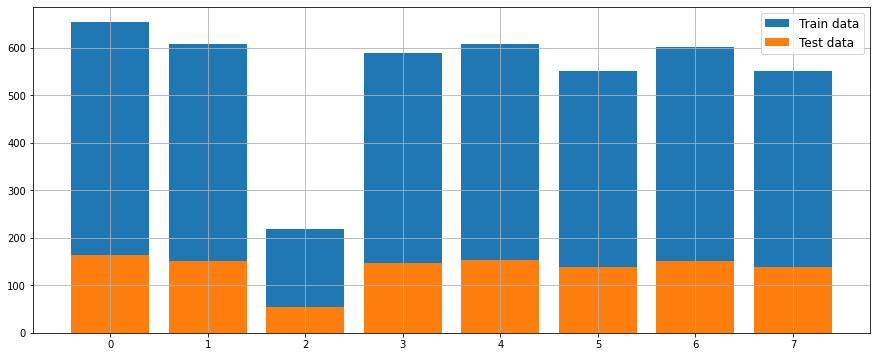

In [32]:
CLASSES, emotions = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('D:/thesis_codes/7_Spectrogram_2DCNN/FSER_REIMP_DONE/output'):
    f = os.path.basename(root)    # get class name - Amethyst, Onyx, etc    
        
    if len(files) > 0:
        emotions.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) # add folder name
    
    # uncomment this block if you want a text output about each subfolder
    #count_dirs = 0
    #for f in dirs:           # count subfolders
        #count_dirs += 1
    #depth = root.split(os.sep)
    #print((len(depth) - 2) * '--'+'>', '{}:\t {} folders, {} imgs'.format(os.path.basename(root), count_dirs, gems[-1] if gems!=[] else 0)) 
    
classes_count = len(CLASSES) # 8 = number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(emotions)))

f, ax = plt.subplots(figsize=(15,6))
if(emotions[0])<10:
    plt.bar(range(classes_count), emotions[classes_count:], label = 'Train data')
    plt.bar(range(classes_count), emotions[0:classes_count], label = 'Test data')
else:
    plt.bar(range(classes_count), emotions[0:classes_count], label = 'Train data')
    plt.bar(range(classes_count), emotions[classes_count:], label = 'Test data')
ax.grid()
ax.legend(fontsize = 12);

In [50]:
## 2 = calm
img_w, img_h = 128, 128

In [51]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name - Amethyst, Onyx, etc       
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(64), int(64)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images, Labels)

In [52]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):    # foreach CLASSES
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

In [53]:
Train_Imgs, Train_Lbls = read_imgs_lbls(train_dir)
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))

Shape of train images: (4383, 64, 64, 3)
Shape of train labels: (4383,)


In [55]:
classlist = CLASSES
classlist

['anger',
 'anxiety',
 'calm',
 'disgust',
 'happiness',
 'neutral',
 'sadness',
 'surprise']

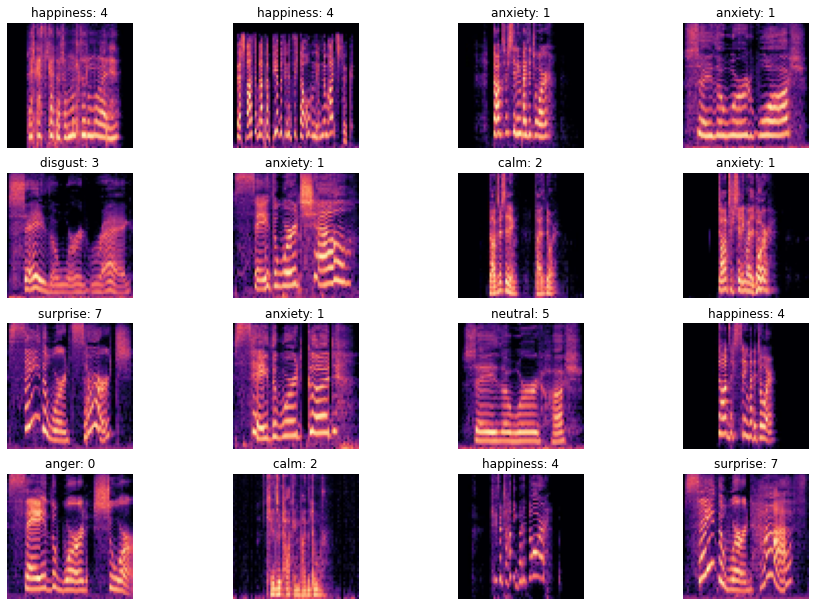

In [56]:
dim = 4
f,ax = plt.subplots(dim,dim) 
f.subplots_adjust(0,0,2,2)
for i in range(0,dim):
    for j in range(0,dim):
        rnd_number = randint(0,len(Train_Imgs))
        cl = Train_Lbls[rnd_number]
        ax[i,j].imshow(Train_Imgs[rnd_number])
        ax[i,j].set_title(CLASSES[cl]+': ' + str(cl))
        ax[i,j].axis('off')

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Train_Imgs, Train_Lbls, shuffle = True, test_size = 0.2, random_state = 42)
print('Shape of X_train: {}, y_train: {} '.format(X_train.shape, y_train.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (3506, 64, 64, 3), y_train: (3506,) 
Shape of X_val: (877, 64, 64, 3), y_val: (877,) 


In [58]:
filters = 32      # the dimensionality of the output space
kernel_size = 3   # length of the 2D convolution window
max_pool = 2      # size of the max pooling windows

In [48]:
EPOCHS = 70                                 
batch_size = 32                             
iter_per_epoch = len(X_train) // batch_size  
val_per_epoch = len(X_val) // batch_size     

In [74]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,GlobalMaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import optimizers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils 
import keras
from keras import optimizers   

In [75]:
model = Sequential()

# first layer
model.add(Conv2D(batch_size, (kernel_size, kernel_size), activation='relu', padding='same', input_shape=(64, 64, 3))) # 32
model.add(MaxPooling2D((max_pool, max_pool))) #reduce the spatial size of incoming features

# second layer
model.add(Conv2D(2*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 64
model.add(MaxPooling2D((max_pool, max_pool))) 

# third layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool))) 

# fourth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(AveragePooling2D(pool_size= (2, 2), strides= (2, 2))) 

# fifth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool))) 

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(16*batch_size, activation='relu'))                                             # 512
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 128)       

In [59]:
model = Sequential()

# first layer
model.add(Conv2D(8, (5, 5), activation='relu', padding='same', input_shape=(64, 64, 3))) # 8
model.add(Conv2D(8, (5, 5), activation='relu', padding='same', )) # 8
model.add(Conv2D(8, (5, 5), activation='relu', padding='same', )) # 8
model.add(Conv2D(8, (5, 5), activation='relu', padding='same', )) # 8
model.add(MaxPooling2D((max_pool, max_pool))) #reduce the spatial size of incoming features
model.add(Dropout(0.2))

# second layer
model.add(Conv2D(16, (5, 5), activation='relu', padding='same' )) # 16
model.add(Conv2D(16, (5, 5), activation='relu', padding='same' )) #
model.add(Conv2D(16, (5, 5), activation='relu', padding='same' )) # 
model.add(Conv2D(16, (5, 5), activation='relu', padding='same' )) # 
model.add(Conv2D(16, (5, 5), activation='relu', padding='same' )) # 
model.add(Conv2D(16, (5, 5), activation='relu', padding='same' )) # 
model.add(MaxPooling2D((max_pool, max_pool))) 
model.add(Dropout(0.2))


# third layer
model.add(Conv2D(100, (5, 5), activation='relu', padding='same' )) # 16
model.add(Conv2D(100, (5, 5), activation='relu', padding='same' )) #
model.add(Conv2D(100, (5, 5), activation='relu', padding='same' )) # 
model.add(Conv2D(100, (5, 5), activation='relu', padding='same' )) # 
model.add(Conv2D(100, (5, 5), activation='relu', padding='same' )) # 
model.add(MaxPooling2D((max_pool, max_pool))) 
model.add(Dropout(0.2))

# fourth layer
model.add(Conv2D(200, (5, 5), activation='relu', padding='same' )) # 16
model.add(Conv2D(200, (5, 5), activation='relu', padding='same' )) #
model.add(Conv2D(200, (5, 5), activation='relu', padding='same' )) # 
model.add(Conv2D(200, (5, 5), activation='relu', padding='same' )) # 
model.add(MaxPooling2D((max_pool, max_pool))) 
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(17424, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         608       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1608      
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         1608      
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 8)         1608      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 8)         0         
                                                        

In [76]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [77]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(              # this is the augmentation configuration used for training
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
        )

val_datagen = ImageDataGenerator()                # for val/testing only rescaling function 

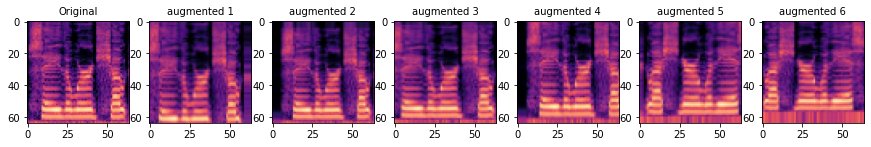

In [78]:
n = randint(0,len(X_train))
samples = np.expand_dims(X_train[n], 0)
it = train_datagen.flow(samples, batch_size=batch_size)
cols = 7

fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15, 10))
ax[0].imshow(X_train[n], cmap='gray')
ax[0].set_title('Original', fontsize=10)

for i in range(1,cols):
    batch = it.next()    # generate batch of images 
    image = batch[0].astype('uint32') # convert to unsigned int for viewing
    ax[i].set_title('augmented {}'.format(i), fontsize=10)
    ax[i].imshow(image, cmap='gray')

In [79]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [80]:
m = model.fit_generator(
       train_gen,
       steps_per_epoch= iter_per_epoch,
       epochs=200, 
       validation_data = val_gen,
       validation_steps = val_per_epoch,
       verbose = 1 # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
       )

Epoch 1/200
109/109 [==============================] - 6s 43ms/step - loss: 2.4499 - accuracy: 0.1739 - val_loss: 1.8796 - val_accuracy: 0.3067
Epoch 2/200
109/109 [==============================] - 4s 37ms/step - loss: 1.8404 - accuracy: 0.2997 - val_loss: 1.6524 - val_accuracy: 0.3634
Epoch 3/200
109/109 [==============================] - 4s 38ms/step - loss: 1.6554 - accuracy: 0.3733 - val_loss: 1.4462 - val_accuracy: 0.4653
Epoch 4/200
109/109 [==============================] - 4s 37ms/step - loss: 1.5004 - accuracy: 0.4257 - val_loss: 1.3224 - val_accuracy: 0.4884
Epoch 5/200
109/109 [==============================] - 4s 37ms/step - loss: 1.3293 - accuracy: 0.4951 - val_loss: 1.2668 - val_accuracy: 0.5127
Epoch 6/200
109/109 [==============================] - 4s 37ms/step - loss: 1.2395 - accuracy: 0.5276 - val_loss: 1.0911 - val_accuracy: 0.5949
Epoch 7/200
109/109 [==============================] - 4s 38ms/step - loss: 1.1717 - accuracy: 0.5665 - val_loss: 1.0472 - val_accuracy:

109/109 [==============================] - 4s 37ms/step - loss: 0.4518 - accuracy: 0.8339 - val_loss: 0.7113 - val_accuracy: 0.7488
Epoch 114/200
109/109 [==============================] - 4s 37ms/step - loss: 0.4366 - accuracy: 0.8460 - val_loss: 0.6720 - val_accuracy: 0.7755
Epoch 115/200
109/109 [==============================] - 4s 37ms/step - loss: 0.4382 - accuracy: 0.8451 - val_loss: 0.7221 - val_accuracy: 0.7697
Epoch 116/200
109/109 [==============================] - 4s 38ms/step - loss: 0.4586 - accuracy: 0.8310 - val_loss: 0.8507 - val_accuracy: 0.7454
Epoch 117/200
109/109 [==============================] - 4s 37ms/step - loss: 0.4795 - accuracy: 0.8264 - val_loss: 0.7665 - val_accuracy: 0.7465
Epoch 118/200
109/109 [==============================] - 4s 37ms/step - loss: 0.4379 - accuracy: 0.8440 - val_loss: 0.7206 - val_accuracy: 0.7616
Epoch 119/200
109/109 [==============================] - 4s 37ms/step - loss: 0.4164 - accuracy: 0.8495 - val_loss: 0.7931 - val_accuracy:

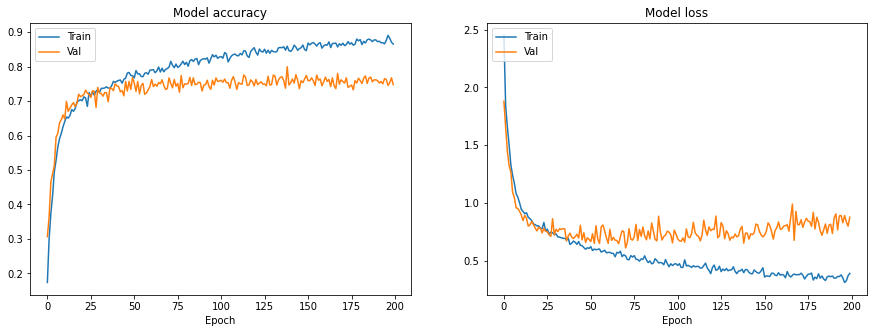

In [81]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(m.history['accuracy'])
axs[0].plot(m.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(m.history['loss'])
axs[1].plot(m.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [82]:
score = model.evaluate_generator(val_gen, steps= len(val_gen))

for idx, metric in enumerate(model.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

loss:0.8751133680343628
accuracy:0.744583785533905


<AxesSubplot:>

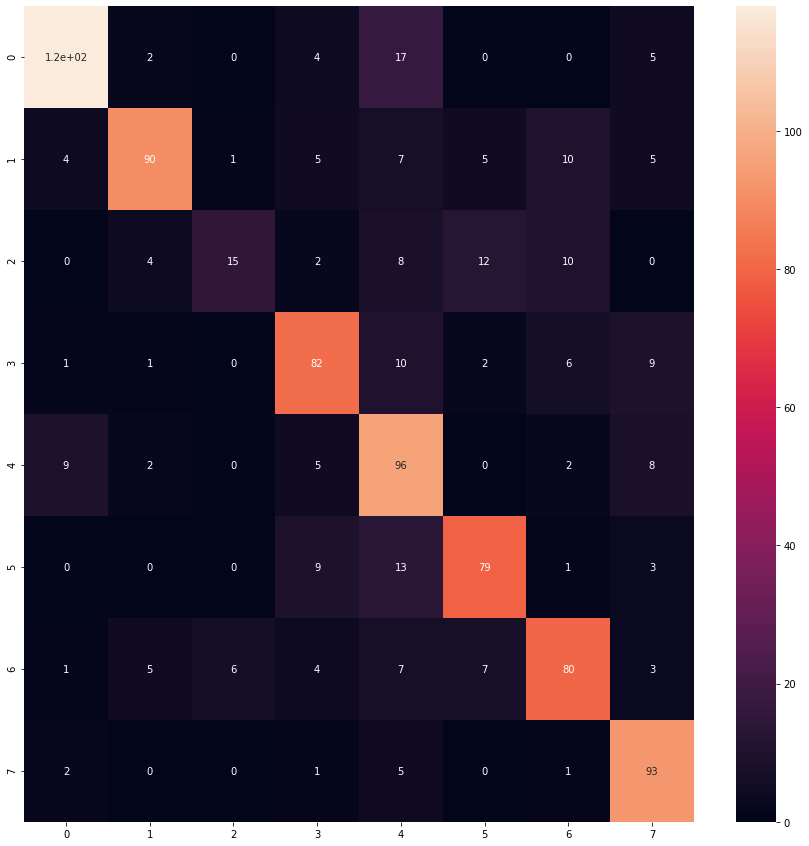

In [83]:
from sklearn.metrics import confusion_matrix
y_pre_test=model.predict(X_val)
y_pre_test=np.argmax(y_pre_test,axis=1)
cm=confusion_matrix(y_val,y_pre_test)

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'anger'),
  Text(0, 1.5, 'anxiety'),
  Text(0, 2.5, 'calm'),
  Text(0, 3.5, 'disgust'),
  Text(0, 4.5, 'happiness'),
  Text(0, 5.5, 'neutral'),
  Text(0, 6.5, 'sadness'),
  Text(0, 7.5, 'surprise')])

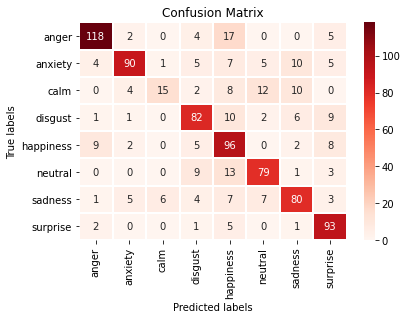

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True,linecolor='white', cmap='Reds', linewidth=2, fmt='', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classlist); ax.yaxis.set_ticklabels(classlist);
plt.xticks(rotation=90)
plt.yticks(rotation=0)

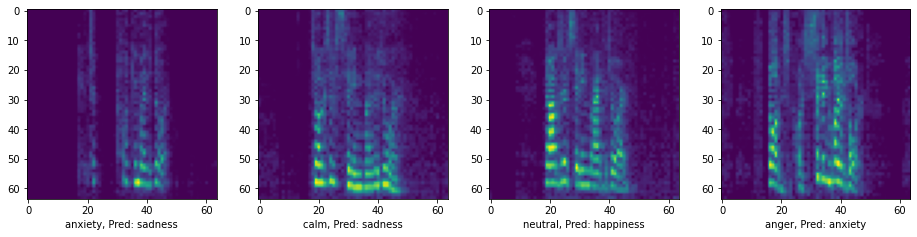

In [85]:
x=(y_pre_test-y_val!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

fig,ax=plt.subplots(1,4,sharey=False,figsize=(13,13))
fig.tight_layout()

for i in range(4):
    ax[i].imshow(X_val[x[i]][:,:,1])
    ax[i].set_xlabel('{}, Pred: {}'.format(CLASSES[y_val[x[i]]],CLASSES[y_pre_test[x[i]]]))

In [86]:
model.save('fser_v1.h5')

In [90]:
import sklearn.metrics as  metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

In [111]:
out = []
for i in range (len(y_pred)):
    out.append(np.argmax(y_pred[i]))
out  = np.array(out)  
out

array([6, 4, 0, 4, 6, 0, 1, 1, 4, 4, 0, 3, 6, 3, 0, 3, 1, 5, 6, 4, 1, 1,
       5, 0, 3, 6, 3, 7, 0, 7, 3, 0, 1, 6, 3, 7, 5, 1, 3, 4, 1, 4, 0, 1,
       4, 6, 6, 2, 0, 3, 6, 7, 4, 7, 5, 0, 1, 5, 4, 6, 4, 5, 7, 5, 6, 4,
       0, 4, 6, 3, 6, 4, 7, 4, 4, 0, 4, 6, 0, 7, 5, 4, 3, 7, 3, 1, 7, 7,
       6, 4, 7, 7, 7, 0, 7, 5, 3, 4, 3, 4, 3, 6, 6, 3, 4, 6, 3, 0, 6, 3,
       0, 1, 6, 3, 3, 4, 3, 5, 5, 5, 4, 7, 6, 5, 5, 0, 4, 0, 1, 4, 0, 7,
       7, 5, 6, 6, 3, 0, 0, 1, 5, 4, 2, 7, 5, 6, 2, 3, 7, 5, 3, 3, 0, 1,
       3, 7, 1, 3, 1, 4, 3, 4, 6, 3, 0, 5, 4, 7, 7, 7, 2, 1, 6, 7, 1, 5,
       3, 7, 5, 6, 1, 3, 1, 7, 7, 5, 1, 4, 5, 4, 0, 3, 0, 5, 5, 1, 4, 4,
       1, 6, 4, 6, 0, 7, 6, 0, 4, 4, 6, 5, 0, 0, 0, 0, 7, 0, 1, 5, 7, 3,
       5, 0, 4, 4, 5, 3, 5, 6, 1, 2, 7, 2, 3, 4, 7, 6, 1, 7, 4, 7, 4, 4,
       3, 7, 0, 0, 5, 3, 5, 5, 6, 1, 7, 4, 6, 6, 3, 0, 5, 0, 3, 1, 5, 3,
       6, 3, 3, 0, 0, 4, 6, 7, 7, 4, 0, 3, 5, 7, 3, 7, 6, 3, 4, 6, 5, 4,
       0, 4, 0, 1, 4, 4, 2, 1, 1, 4, 4, 5, 4, 3, 2,

In [112]:
y_val

array([1, 4, 0, 4, 2, 0, 1, 1, 5, 4, 0, 3, 6, 3, 0, 3, 0, 5, 6, 4, 1, 1,
       5, 4, 3, 6, 3, 3, 0, 7, 3, 0, 1, 1, 4, 7, 5, 1, 4, 2, 1, 4, 0, 1,
       4, 6, 3, 2, 0, 3, 6, 7, 4, 7, 5, 0, 1, 3, 4, 6, 3, 5, 7, 5, 2, 5,
       0, 0, 3, 6, 6, 0, 4, 0, 5, 0, 4, 1, 0, 7, 5, 4, 3, 7, 3, 1, 7, 4,
       6, 5, 7, 7, 7, 0, 0, 5, 3, 3, 3, 4, 3, 3, 6, 5, 4, 6, 6, 0, 6, 3,
       0, 1, 6, 3, 3, 0, 5, 6, 5, 5, 4, 7, 6, 5, 5, 0, 0, 0, 1, 4, 0, 7,
       7, 5, 6, 6, 3, 4, 0, 1, 2, 4, 2, 7, 5, 3, 6, 5, 7, 5, 3, 5, 0, 1,
       5, 7, 6, 3, 4, 4, 3, 4, 6, 3, 1, 5, 0, 7, 7, 7, 2, 1, 6, 7, 1, 5,
       3, 7, 2, 2, 1, 3, 1, 7, 3, 5, 6, 4, 5, 1, 0, 3, 0, 5, 1, 2, 4, 1,
       1, 2, 4, 6, 0, 0, 1, 0, 4, 2, 6, 6, 0, 0, 1, 0, 3, 0, 1, 5, 7, 3,
       6, 0, 4, 4, 5, 5, 1, 4, 1, 2, 1, 2, 3, 4, 7, 1, 1, 4, 4, 6, 7, 7,
       3, 7, 4, 0, 5, 3, 5, 6, 2, 1, 7, 4, 6, 6, 3, 0, 5, 0, 3, 1, 2, 3,
       6, 3, 3, 3, 0, 4, 6, 4, 7, 3, 0, 3, 5, 7, 4, 7, 6, 0, 0, 1, 2, 4,
       0, 4, 0, 1, 4, 3, 6, 2, 1, 5, 1, 5, 4, 7, 2,

In [115]:
y_pred = model.predict(X_val)
report=metrics.classification_report(y_val,out) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(y_val , out)
print(matrix)
metrics.accuracy_score(y_val,out)*100 

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       146
           1       0.87      0.71      0.78       127
           2       0.68      0.29      0.41        51
           3       0.73      0.74      0.74       111
           4       0.59      0.79      0.67       122
           5       0.75      0.75      0.75       105
           6       0.73      0.71      0.72       113
           7       0.74      0.91      0.82       102

    accuracy                           0.74       877
   macro avg       0.75      0.71      0.72       877
weighted avg       0.75      0.74      0.74       877

[[118   2   0   4  17   0   0   5]
 [  4  90   1   5   7   5  10   5]
 [  0   4  15   2   8  12  10   0]
 [  1   1   0  82  10   2   6   9]
 [  9   2   0   5  96   0   2   8]
 [  0   0   0   9  13  79   1   3]
 [  1   5   6   4   7   7  80   3]
 [  2   0   0   1   5   0   1  93]]


74.45838084378563

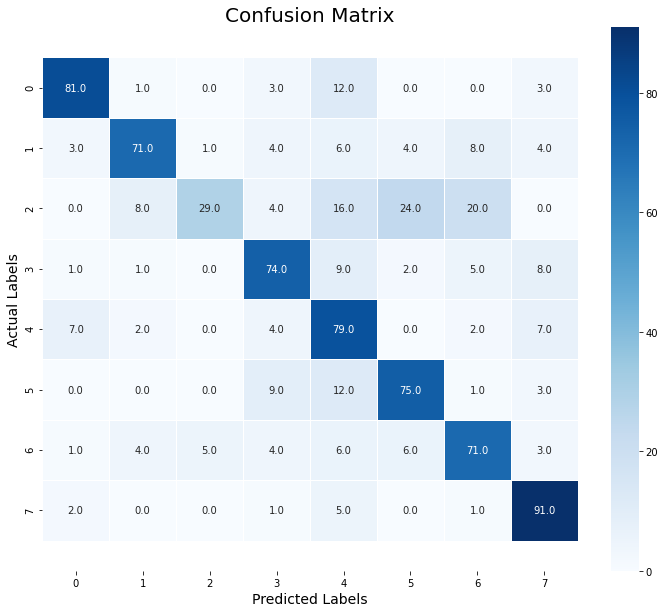

In [116]:
cm = confusion_matrix(y_val, out,normalize='true')
plt.figure(figsize = (12, 10))
#conf_matrix= pd.DataFrame(cm,columns=None)
#conf_matrix.to_csv(r'E:\confusion_matrix.csv', index = False, header=False)
ax = sns.heatmap(np.round(cm*100), linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [4]:
import tensorflow 
tensorflow.__version__

'2.8.0'